# Counting shapes

Training times for this task are too long to do interactively, so they were done in batch using a Python scrip [`count_shapes.py`](count_shapes.py) and a PBS script [`count_shapes.pbs`](count_shapes.pbs).  Here, we analyse the results of that computation.

## Required modules

In [1]:
from data_utils import process_data
from history_utils import plot_history_file
from keras.models import load_model
import numpy as np

Using TensorFlow backend.


## History

The training history containing the loss and accuracty informatino as a function of the training epochs has been saved as a pickle file.

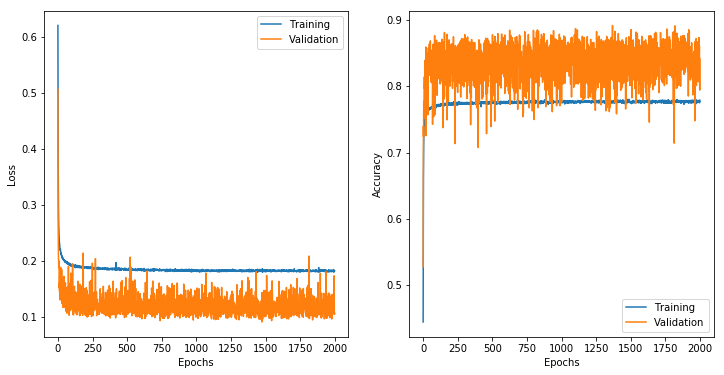

In [17]:
plot_history_file('count_shapes_hist.h5')

## Model

The model itself has been saved as an HDF5 file

In [3]:
model = load_model('count_shapes.h5')

We can load a small test set to evaluate performance and analyse network properties.

In [4]:
x_test, y_test = process_data('test_multi_obj_data.h5')

In [5]:
model.evaluate(x_test, y_test)

20000/20000 [==============================] - 144s 7ms/step


[0.12421001389622688, 0.8415]

In [15]:
y_predictions = model.predict(x_test)

In [16]:
y_predictionsdictions

array([[ 1.2278616 ,  0.39739633,  1.3989452 ],
       [ 0.09077501,  0.6903296 ,  1.2683388 ],
       [ 0.16095912,  2.0847304 , -0.        ],
       ...,
       [ 0.99689656, -0.        ,  1.1998389 ],
       [ 0.8722133 ,  3.2760606 , -0.        ],
       [ 2.462416  ,  0.6138073 , -0.        ]], dtype=float32)

In [6]:
y_counts = np.round(y_predictions).astype(np.int64)

In [10]:
correct = y_counts == y_test

In [14]:
correct.sum()/y_counts.sum()

0.8845217272010152